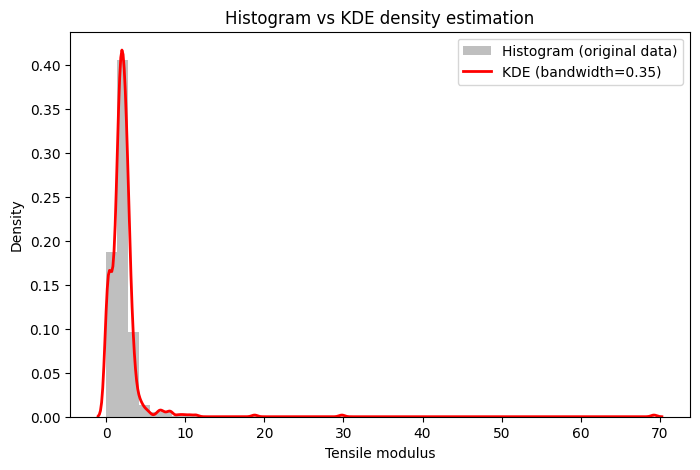

In [30]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.neighbors import KernelDensity

# --------------------------
# 1. load data
# --------------------------
with open("../configs/default.yaml", "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)

RAW_PATH = Path("../") / config["data"]["raw_path"]
df = pd.read_csv(RAW_PATH)

col = df[config["data"]["target_column"]]
col.head()

y = np.array(col).reshape(-1, 1)

# --------------------------
# 2. KDE training
# --------------------------
bandwidth = 0.35  # bandwidth could be controlled by distribution
kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(y)

# density estimation using KDE
y_grid = np.linspace(y.min() - 1, y.max() + 1, 500).reshape(-1, 1)
log_density = kde.score_samples(y_grid)
density = np.exp(log_density)  # log density → density

# --------------------------
# 3. visualize
# --------------------------
plt.figure(figsize=(8, 5))

# Histogram (original data distribution)
plt.hist(y, bins=50, density=True, alpha=0.5, color="gray", label="Histogram (original data)")

# KDE curve
plt.plot(y_grid, density, color="red", linewidth=2, label=f"KDE (bandwidth={bandwidth})")

plt.xlabel("Tensile modulus")
plt.ylabel("Density")
plt.title("Histogram vs KDE density estimation")
plt.legend()
plt.show()
